Question 1
Introduction:
Special thanks to: https://github.com/justmarkham for sharing the dataset and 
materials.
Occupations
Step 1. Import the necessary libraries
Step 2. Import the dataset from this address.
Step 3. Assign it to a variable called users
Step 4. Discover what is the mean age per occupation
Step 5. Discover the Male ratio per occupation and sort it from the most to the least
Step 6. For each occupation, calculate the minimum and maximum ages
Step 7. For each combination of occupation and sex, calculate the mean age
Step 8. For each occupation present the percentage of women and men

In [16]:
pip install pandas numpy


Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\programdata\anaconda3\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [17]:
import pandas as pd
import numpy as np


In [20]:
# Step 2: Import the dataset
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user'  
users = pd.read_csv(url, delimiter='|') 
print(users)

     user_id  age gender     occupation zip_code
0          1   24      M     technician    85711
1          2   53      F          other    94043
2          3   23      M         writer    32067
3          4   24      M     technician    43537
4          5   33      F          other    15213
..       ...  ...    ...            ...      ...
938      939   26      F        student    33319
939      940   32      M  administrator    02215
940      941   20      M        student    97229
941      942   48      F      librarian    78209
942      943   22      M        student    77841

[943 rows x 5 columns]


In [24]:
# Step 3a: Verify the correct column name for gender/sex
if 'sex' in users.columns:
    gender_col = 'sex'
elif 'gender' in users.columns:
    gender_col = 'gender'
else:
    raise KeyError("The dataset does not contain a 'sex' or 'gender' column.")

In [21]:
# Step 4: Discover the mean age per occupation
mean_age_per_occupation = users.groupby('occupation')['age'].mean()
print("\nMean age per occupation:\n", mean_age_per_occupation)



Mean age per occupation:
 occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64


In [25]:
# Step 5: Discover the Male ratio per occupation and sort it from most to least
male_ratio_per_occupation = users[users[gender_col] == 'M'].groupby('occupation').size() / users.groupby('occupation').size()
male_ratio_per_occupation = male_ratio_per_occupation.sort_values(ascending=False)
print("\nMale ratio per occupation (sorted):\n", male_ratio_per_occupation)


Male ratio per occupation (sorted):
 occupation
doctor           1.000000
engineer         0.970149
technician       0.962963
retired          0.928571
programmer       0.909091
executive        0.906250
scientist        0.903226
entertainment    0.888889
lawyer           0.833333
salesman         0.750000
educator         0.726316
student          0.693878
other            0.657143
marketing        0.615385
writer           0.577778
none             0.555556
administrator    0.544304
artist           0.535714
librarian        0.431373
healthcare       0.312500
homemaker        0.142857
dtype: float64


In [27]:
# Step 6: For each occupation, calculate the minimum and maximum ages
min_max_age_per_occupation = users.groupby('occupation')['age'].agg(['min', 'max'])
print("\nMinimum and maximum ages per occupation:\n", min_max_age_per_occupation)


Minimum and maximum ages per occupation:
                min  max
occupation             
administrator   21   70
artist          19   48
doctor          28   64
educator        23   63
engineer        22   70
entertainment   15   50
executive       22   69
healthcare      22   62
homemaker       20   50
lawyer          21   53
librarian       23   69
marketing       24   55
none            11   55
other           13   64
programmer      20   63
retired         51   73
salesman        18   66
scientist       23   55
student          7   42
technician      21   55
writer          18   60


In [28]:
# Step 7: For each combination of occupation and gender, calculate the mean age
mean_age_per_occupation_gender = users.groupby(['occupation', gender_col])['age'].mean()
print("\nMean age per occupation and gender:\n", mean_age_per_occupation_gender)



Mean age per occupation and gender:
 occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.02

In [29]:
# Step 8: For each occupation present the percentage of women and men
gender_counts_per_occupation = users.groupby(['occupation', gender_col]).size().unstack().fillna(0)
gender_percentage_per_occupation = gender_counts_per_occupation.div(gender_counts_per_occupation.sum(axis=1), axis=0) * 100
print("\nPercentage of women and men per occupation:\n", gender_percentage_per_occupation)


Percentage of women and men per occupation:
 gender                 F           M
occupation                          
administrator  45.569620   54.430380
artist         46.428571   53.571429
doctor          0.000000  100.000000
educator       27.368421   72.631579
engineer        2.985075   97.014925
entertainment  11.111111   88.888889
executive       9.375000   90.625000
healthcare     68.750000   31.250000
homemaker      85.714286   14.285714
lawyer         16.666667   83.333333
librarian      56.862745   43.137255
marketing      38.461538   61.538462
none           44.444444   55.555556
other          34.285714   65.714286
programmer      9.090909   90.909091
retired         7.142857   92.857143
salesman       25.000000   75.000000
scientist       9.677419   90.322581
student        30.612245   69.387755
technician      3.703704   96.296296
writer         42.222222   57.777778


Question 2
Euro Teams
Step 1. Import the necessary libraries
Step 2. Import the dataset from this address
Step 3. Assign it to a variable called euro12
Step 4. Select only the Goal column
Step 5. How many team participated in the Euro2012?
Step 6. What is the number of columns in the dataset?
Step 7. View only the columns Team, Yellow Cards and Red Cards and assign them 
to a dataframe called discipline
Step 8. Sort the teams by Red Cards, then to Yellow Cards
Step 9. Calculate the mean Yellow Cards given per Team
Step 10. Filter teams that scored more than 6 goalsStep 11. Select the teams that start 
with G
Step 12. Select the first 7 columns
Step 13. Select all columns except the last 3
Step 14. Present only the Shooting Accuracy from England, Italy and Russia


In [30]:
import pandas as pd


In [38]:

url = 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv'

try:
    
    euro12 = pd.read_csv(url)
    print("Dataset loaded successfully.")
    print(euro12.head())  
except pd.errors.EmptyDataError:
    print("Error: The file is empty or not in a valid CSV format.")
except pd.errors.ParserError:
    print("Error: There was an issue parsing the file.")
except Exception as e:
    print(f"An error occurred: {e}")

Dataset loaded successfully.
             Team  Goals  Shots on target  Shots off target Shooting Accuracy  \
0         Croatia      4               13                12             51.9%   
1  Czech Republic      4               13                18             41.9%   
2         Denmark      4               10                10             50.0%   
3         England      5               11                18             50.0%   
4          France      3               22                24             37.9%   

  % Goals-to-shots  Total shots (inc. Blocked)  Hit Woodwork  Penalty goals  \
0            16.0%                          32             0              0   
1            12.9%                          39             0              0   
2            20.0%                          27             1              0   
3            17.2%                          40             0              0   
4             6.5%                          65             1              0   

   Penalt

In [39]:
# Step 3: Print the first few rows of the dataset
print("\nStep 3: Dataset preview:\n", euro12.head())


Step 3: Dataset preview:
              Team  Goals  Shots on target  Shots off target Shooting Accuracy  \
0         Croatia      4               13                12             51.9%   
1  Czech Republic      4               13                18             41.9%   
2         Denmark      4               10                10             50.0%   
3         England      5               11                18             50.0%   
4          France      3               22                24             37.9%   

  % Goals-to-shots  Total shots (inc. Blocked)  Hit Woodwork  Penalty goals  \
0            16.0%                          32             0              0   
1            12.9%                          39             0              0   
2            20.0%                          27             1              0   
3            17.2%                          40             0              0   
4             6.5%                          65             1              0   

   Penaltie

In [40]:
# Step 4: Select only the Goal column
goals = euro12['Goals']
print("\nStep 4: Goals column:\n", goals)


Step 4: Goals column:
 0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64


In [41]:
# Step 5: How many teams participated in Euro 2012?
num_teams = len(euro12)
print("\nStep 5: Number of teams that participated in Euro 2012:", num_teams)


Step 5: Number of teams that participated in Euro 2012: 16


In [42]:
# Step 6: What is the number of columns in the dataset?
num_columns = len(euro12.columns)
print("\nStep 6: Number of columns in the dataset:", num_columns)


Step 6: Number of columns in the dataset: 35


In [43]:
# Step 7: View only the columns Team, Yellow Cards, and Red Cards and assign them to a dataframe called discipline
discipline = euro12[['Team', 'Yellow Cards', 'Red Cards']]
print("\nStep 7: Discipline dataframe:\n", discipline)


Step 7: Discipline dataframe:
                    Team  Yellow Cards  Red Cards
0               Croatia             9          0
1        Czech Republic             7          0
2               Denmark             4          0
3               England             5          0
4                France             6          0
5               Germany             4          0
6                Greece             9          1
7                 Italy            16          0
8           Netherlands             5          0
9                Poland             7          1
10             Portugal            12          0
11  Republic of Ireland             6          1
12               Russia             6          0
13                Spain            11          0
14               Sweden             7          0
15              Ukraine             5          0


In [44]:
# Step 8: Sort the teams by Red Cards, then by Yellow Cards
sorted_discipline = discipline.sort_values(by=['Red Cards', 'Yellow Cards'], ascending=[False, False])
print("\nStep 8: Sorted teams by Red Cards and Yellow Cards:\n", sorted_discipline)


Step 8: Sorted teams by Red Cards and Yellow Cards:
                    Team  Yellow Cards  Red Cards
6                Greece             9          1
9                Poland             7          1
11  Republic of Ireland             6          1
7                 Italy            16          0
10             Portugal            12          0
13                Spain            11          0
0               Croatia             9          0
1        Czech Republic             7          0
14               Sweden             7          0
4                France             6          0
12               Russia             6          0
3               England             5          0
8           Netherlands             5          0
15              Ukraine             5          0
2               Denmark             4          0
5               Germany             4          0


In [45]:
# Step 9: Calculate the mean Yellow Cards given per team
mean_yellow_cards = discipline['Yellow Cards'].mean()
print("\nStep 9: Mean Yellow Cards given per team:", mean_yellow_cards)


Step 9: Mean Yellow Cards given per team: 7.4375


In [46]:
# Step 10: Filter teams that scored more than 6 goals
teams_more_than_6_goals = euro12[euro12['Goals'] > 6]
print("\nStep 10: Teams that scored more than 6 goals:\n", teams_more_than_6_goals[['Team', 'Goals']])



Step 10: Teams that scored more than 6 goals:
        Team  Goals
5   Germany     10
13    Spain     12


In [47]:
# Step 11: Select the teams that start with G
teams_start_with_G = euro12[euro12['Team'].str.startswith('G')]
print("\nStep 11: Teams that start with G:\n", teams_start_with_G[['Team']])


Step 11: Teams that start with G:
       Team
5  Germany
6   Greece


In [48]:
# Step 12: Select the first 7 columns
first_7_columns = euro12.iloc[:, :7]
print("\nStep 12: First 7 columns:\n", first_7_columns)



Step 12: First 7 columns:
                    Team  Goals  Shots on target  Shots off target  \
0               Croatia      4               13                12   
1        Czech Republic      4               13                18   
2               Denmark      4               10                10   
3               England      5               11                18   
4                France      3               22                24   
5               Germany     10               32                32   
6                Greece      5                8                18   
7                 Italy      6               34                45   
8           Netherlands      2               12                36   
9                Poland      2               15                23   
10             Portugal      6               22                42   
11  Republic of Ireland      1                7                12   
12               Russia      5                9                31   
13    

In [49]:
# Step 13: Select all columns except the last 3
all_but_last_3 = euro12.iloc[:, :-3]
print("\nStep 13: All columns except the last 3:\n", all_but_last_3)



Step 13: All columns except the last 3:
                    Team  Goals  Shots on target  Shots off target  \
0               Croatia      4               13                12   
1        Czech Republic      4               13                18   
2               Denmark      4               10                10   
3               England      5               11                18   
4                France      3               22                24   
5               Germany     10               32                32   
6                Greece      5                8                18   
7                 Italy      6               34                45   
8           Netherlands      2               12                36   
9                Poland      2               15                23   
10             Portugal      6               22                42   
11  Republic of Ireland      1                7                12   
12               Russia      5                9              

In [50]:
# Step 14: Present only the Shooting Accuracy from England, Italy, and Russia
shooting_accuracy = euro12[euro12['Team'].isin(['England', 'Italy', 'Russia'])][['Team', 'Shooting Accuracy']]
print("\nStep 14: Shooting Accuracy from England, Italy, and Russia:\n", shooting_accuracy)


Step 14: Shooting Accuracy from England, Italy, and Russia:
        Team Shooting Accuracy
3   England             50.0%
7     Italy             43.0%
12   Russia             22.5%


Question 3
Housing
Step 1. Import the necessary libraries
Step 2. Create 3 differents Series, each of length 100, as follows:
• The first a random number from 1 to 4
• The second a random number from 1 to 3
• The third a random number from 10,000 to 30,000
Step 3. Create a DataFrame by joinning the Series by column
Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter
Step 5. Create a one column DataFrame with the values of the 3 Series and assign it 
to 'bigcolumn'
Step 6. Ops it seems it is going only until index 99. Is it true?
Step 7. Reindex the DataFrame so it goes from 0 to 299

In [51]:
# Step 1: Import the necessary libraries
import pandas as pd
import numpy as np

In [52]:
# Step 2: Create 3 different Series, each of length 100
# First Series: Random numbers from 1 to 4
series1 = pd.Series(np.random.randint(1, 5, size=100))
print("\nStep 2a: Series 1:\n", series1.head())


Step 2a: Series 1:
 0    1
1    3
2    1
3    3
4    4
dtype: int32


In [53]:
# Second Series: Random numbers from 1 to 3
series2 = pd.Series(np.random.randint(1, 4, size=100))
print("\nStep 2b: Series 2:\n", series2.head())


Step 2b: Series 2:
 0    3
1    1
2    1
3    2
4    2
dtype: int32


In [54]:
# Third Series: Random numbers from 10,000 to 30,000
series3 = pd.Series(np.random.randint(10000, 30001, size=100))
print("\nStep 2c: Series 3:\n", series3.head())



Step 2c: Series 3:
 0    28831
1    15846
2    17377
3    10338
4    14344
dtype: int32


In [55]:
# Step 3: Create a DataFrame by joining the Series by column
df = pd.DataFrame({
    'bedrs': series1,
    'bathrs': series2,
    'price_sqr_meter': series3
})
print("\nStep 3: DataFrame created:\n", df.head())



Step 3: DataFrame created:
    bedrs  bathrs  price_sqr_meter
0      1       3            28831
1      3       1            15846
2      1       1            17377
3      3       2            10338
4      4       2            14344


In [56]:
# Step 4: Change the name of the columns to bedrs, bathrs, price_sqr_meter
df.columns = ['bedrs', 'bathrs', 'price_sqr_meter']
print("\nStep 4: Columns renamed:\n", df.head())



Step 4: Columns renamed:
    bedrs  bathrs  price_sqr_meter
0      1       3            28831
1      3       1            15846
2      1       1            17377
3      3       2            10338
4      4       2            14344


In [57]:
# Step 5: Create a one-column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'
bigcolumn = pd.DataFrame({
    'bigcolumn': pd.concat([series1, series2, series3], ignore_index=True)
})
print("\nStep 5: Big column DataFrame:\n", bigcolumn.head())


Step 5: Big column DataFrame:
    bigcolumn
0          1
1          3
2          1
3          3
4          4


In [58]:
# Step 6: Check if the DataFrame is going only until index 99
print("\nStep 6: Check DataFrame length:", len(bigcolumn))


Step 6: Check DataFrame length: 300


In [59]:
# Step 7: Reindex the DataFrame so it goes from 0 to 299
reindexed_df = bigcolumn.reset_index(drop=True)
print("\nStep 7: Reindexed DataFrame:\n", reindexed_df.head(10))  # Print first 10 rows for verification


Step 7: Reindexed DataFrame:
    bigcolumn
0          1
1          3
2          1
3          3
4          4
5          4
6          1
7          3
8          4
9          4


Question 4
Wind Statistics 
The data have been modified to contain some missing values, identified by NaN.
Using pandas should make this exercise easier, in particular for the bonus question.
You should be able to perform all of these operations without using a for loop or 
other looping construct.
The data in 'wind.data' has the following format:
Yr Mo Dy RPT VAL ROS KIL SHA BIR DUB CLA MUL CLO BEL 
MAL
61 1 1 15.04 14.96 13.17 9.29 NaN 9.87 13.67 10.25 10.83 12.58 18.50 15.04
61 1 2 14.71 NaN 10.83 6.50 12.62 7.67 11.50 10.04 9.79 9.67 17.54 13.83
61 1 3 18.50 16.88 12.33 10.13 11.17 6.17 11.25 NaN 8.50 7.67 12.75 12.71
The first three columns are year, month, and day. The remaining 12 columns are 
average windspeeds in knots at 12 locations in Ireland on that day.
Step 1. Import the necessary libraries
Step 2. Import the dataset from the attached file wind.txt
Step 3. Assign it to a variable called data and replace the first 3 columns by a proper 
datetime index.
Step 4. Year 2061? Do we really have data from this year? Create a function to fix it 
and apply it.
Step 5. Set the right dates as the index. Pay attention at the data type, it should be 
datetime64[ns].
Step 6. Compute how many values are missing for each location over the entire 
record.They should be ignored in all calculations below.
Step 7. Compute how many non-missing values there are in total.
Step 8. Calculate the mean windspeeds of the windspeeds over all the locations and 
all the times.
A single number for the entire dataset.
Step 9. Create a DataFrame called loc_stats and calculate the min, max and mean 
windspeeds and standard deviations of the windspeeds at each location over all the 
days
A different set of numbers for each location.
Step 10. Create a DataFrame called day_stats and calculate the min, max and mean 
windspeed and standard deviations of the windspeeds across all the locations at each 
day.
A different set of numbers for each day.
Step 11. Find the average windspeed in January for each location.
Treat January 1961 and January 1962 both as January.
Step 12. Downsample the record to a yearly frequency for each location.
Step 13. Downsample the record to a monthly frequency for each location.
Step 14. Downsample the record to a weekly frequency for each location.
Step 15. Calculate the min, max and mean windspeeds and standard deviations of the 
windspeeds across all locations for each week (assume that the first week starts on 
January 2 1961) for the first 52 weeks.



In [151]:
import pandas as pd
import numpy as np

In [165]:
# Step 2: Import the dataset from the attached file wind.txt
file_path = "C:\\Users\\kngok\\Downloads\\wind.txt"


data = pd.read_csv(file_path, sep='\s+', header=None)


data.columns = ['Yr', 'Mo', 'Dy', 'RPT', 'VAL', 'ROS', 'KIL', 'SHA', 'BIR', 'DUB', 'CLA', 'MUL', 'CLO', 'BEL', 'MAL']


print("Initial Data Preview:")
print(data.head())


data[['Yr', 'Mo', 'Dy']] = data[['Yr', 'Mo', 'Dy']].apply(pd.to_numeric, errors='coerce')


data['Date'] = pd.to_datetime(data[['Yr', 'Mo', 'Dy']].astype(str).agg('-'.join, axis=1), format='%Y-%m-%d', errors='coerce')


print("\nDate Column Creation:")
print(data['Date'].head())


data.set_index('Date', inplace=True)
data.drop(columns=['Yr', 'Mo', 'Dy'], inplace=True)

print("\nStep 3 - Data with Date Index:")
print(data.head())

Initial Data Preview:
   Yr  Mo  Dy    RPT    VAL    ROS    KIL    SHA   BIR    DUB    CLA    MUL  \
0  Yr  Mo  Dy    RPT    VAL    ROS    KIL    SHA   BIR    DUB    CLA    MUL   
1  61   1   1  15.04  14.96  13.17   9.29    NaN  9.87  13.67  10.25  10.83   
2  61   1   2  14.71    NaN  10.83   6.50  12.62  7.67  11.50  10.04   9.79   
3  61   1   3  18.50  16.88  12.33  10.13  11.17  6.17  11.25    NaN   8.50   
4  61   1   4  10.58   6.63  11.75   4.58   4.54  2.88   8.63   1.79   5.83   

     CLO    BEL    MAL  
0    CLO    BEL    MAL  
1  12.58  18.50  15.04  
2   9.67  17.54  13.83  
3   7.67  12.75  12.71  
4   5.88   5.46  10.88  

Date Column Creation:
0   NaT
1   NaT
2   NaT
3   NaT
4   NaT
Name: Date, dtype: datetime64[ns]

Step 3 - Data with Date Index:
        RPT    VAL    ROS    KIL    SHA   BIR    DUB    CLA    MUL    CLO  \
Date                                                                        
NaT     RPT    VAL    ROS    KIL    SHA   BIR    DUB    CLA    MUL    

In [167]:
# Step 4: Year 2061? Do we really have data from this year? Create a function to fix it and apply it
def fix_years(df):
    df = df.copy()  
    df['Year'] = df.index.year
    df.loc[df['Year'] == 2061, 'Year'] = 1961
    
    new_dates = pd.to_datetime(df['Year'].astype(str) + '-' +
                               df.index.month.astype(str) + '-' +
                               df.index.day.astype(str), format='%Y-%m-%d', errors='coerce')
    df.index = new_dates
    df.drop(columns=['Year'], inplace=True)
    return df

data = fix_years(data)

print("\nStep 4 - Data after fixing years:")
print(data.head())


Step 4 - Data after fixing years:
       RPT    VAL    ROS    KIL    SHA   BIR    DUB    CLA    MUL    CLO  \
NaT    RPT    VAL    ROS    KIL    SHA   BIR    DUB    CLA    MUL    CLO   
NaT  15.04  14.96  13.17   9.29    NaN  9.87  13.67  10.25  10.83  12.58   
NaT  14.71    NaN  10.83   6.50  12.62  7.67  11.50  10.04   9.79   9.67   
NaT  18.50  16.88  12.33  10.13  11.17  6.17  11.25    NaN   8.50   7.67   
NaT  10.58   6.63  11.75   4.58   4.54  2.88   8.63   1.79   5.83   5.88   

       BEL    MAL  
NaT    BEL    MAL  
NaT  18.50  15.04  
NaT  17.54  13.83  
NaT  12.75  12.71  
NaT   5.46  10.88  


In [76]:
# Step 5: Set the right dates as the index (already set in previous steps)


In [168]:
# Step 6: Compute how many values are missing for each location over the entire record
missing_values = data.isna().sum()
print("\nStep 6 - Missing Values per Location:")
print(missing_values)



Step 6 - Missing Values per Location:
RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64


In [169]:
# Step 7: Compute how many non-missing values there are in total
non_missing_values = data.notna().sum().sum()
print("\nStep 7 - Total Non-Missing Values:")
print(non_missing_values)


Step 7 - Total Non-Missing Values:
78869


In [174]:
# Step 8: Calculate the mean windspeeds of the windspeeds over all the locations and all the times

numeric_data = data.select_dtypes(include='number')


print("\nNumeric Data Preview for Step 8:")
print(numeric_data.head())


mean_windspeed = numeric_data.stack().mean()
print("\nStep 8 - Mean Windspeed Over All Locations and Times:")
print(mean_windspeed)


Numeric Data Preview for Step 8:
Empty DataFrame
Columns: []
Index: [NaT, NaT, NaT, NaT, NaT]

Step 8 - Mean Windspeed Over All Locations and Times:
nan


In [175]:
# Step 9: Create a DataFrame called loc_stats and calculate the min, max and mean windspeeds and standard deviations of the windspeeds at each location over all the days
if not numeric_data.empty:
    loc_stats = numeric_data.describe().T
    print("\nStep 9 - Location Stats:")
    print(loc_stats[['min', 'max', 'mean', 'std']])
else:
    print("\nStep 9 - Numeric Data is Empty")


Step 9 - Numeric Data is Empty


In [147]:
# Step 10: Create a DataFrame called day_stats and calculate the min, max and mean windspeed and standard deviations of the windspeeds across all the locations at each day
day_stats = numeric_data.agg(['min', 'max', 'mean', 'std'], axis=1)
print("\nDaily statistics:\n", day_stats.head())


Daily statistics:
             min  max  mean  std
Date                           
1900-01-01  NaN  NaN   NaN  NaN


Question 5
Step 1. Import the necessary libraries
Step 2. Import the dataset from this address.
Step 3. Assign it to a variable called chipo.
Step 4. See the first 10 entries
Step 5. What is the number of observations in the dataset?
Step 6. What is the number of columns in the dataset?
Step 7. Print the name of all the columns.
Step 8. How is the dataset indexed?
Step 9. Which was the most-ordered item?
Step 10. For the most-ordered item, how many items were ordered?
Step 11. What was the most ordered item in the choice_description column?
Step 12. How many items were orderd in total?
Step 13.
• Turn the item price into a float
• Check the item price type
• Create a lambda function and change the type of item price
• Check the item price type
Step 14. How much was the revenue for the period in the dataset?
Step 15. How many orders were made in the period?
Step 16. What is the average revenue amount per order?
Step 17. How many different items are sold

In [90]:
import pandas as pd

In [176]:
# Step 2: Import the dataset from the given URL
# Step 3: Assign it to a variable called chipo
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
chipo = pd.read_csv(url, sep='\t')
print(chipo)

      order_id  quantity                              item_name  \
0            1         1           Chips and Fresh Tomato Salsa   
1            1         1                                   Izze   
2            1         1                       Nantucket Nectar   
3            1         1  Chips and Tomatillo-Green Chili Salsa   
4            2         2                           Chicken Bowl   
...        ...       ...                                    ...   
4617      1833         1                          Steak Burrito   
4618      1833         1                          Steak Burrito   
4619      1834         1                     Chicken Salad Bowl   
4620      1834         1                     Chicken Salad Bowl   
4621      1834         1                     Chicken Salad Bowl   

                                     choice_description item_price  
0                                                   NaN     $2.39   
1                                          [Clementine]  

In [92]:
# Step 4: See the first 10 entries
print("First 10 entries:\n", chipo.head(10))

First 10 entries:
    order_id  quantity                              item_name  \
0         1         1           Chips and Fresh Tomato Salsa   
1         1         1                                   Izze   
2         1         1                       Nantucket Nectar   
3         1         1  Chips and Tomatillo-Green Chili Salsa   
4         2         2                           Chicken Bowl   
5         3         1                           Chicken Bowl   
6         3         1                          Side of Chips   
7         4         1                          Steak Burrito   
8         4         1                       Steak Soft Tacos   
9         5         1                          Steak Burrito   

                                  choice_description item_price  
0                                                NaN     $2.39   
1                                       [Clementine]     $3.39   
2                                            [Apple]     $3.39   
3           

In [94]:
# Step 5: What is the number of observations in the dataset?
num_observations = chipo.shape[0]
print("\nNumber of observations in the dataset:", num_observations)


Number of observations in the dataset: 4622


In [95]:
# Step 6: What is the number of columns in the dataset?
num_columns = chipo.shape[1]
print("\nNumber of columns in the dataset:", num_columns)


Number of columns in the dataset: 5


In [96]:
# Step 7: Print the name of all the columns
print("\nColumn names:\n", chipo.columns.tolist())


Column names:
 ['order_id', 'quantity', 'item_name', 'choice_description', 'item_price']


In [97]:
# Step 8: How is the dataset indexed?
print("\nDataset index:\n", chipo.index)


Dataset index:
 RangeIndex(start=0, stop=4622, step=1)


In [98]:

# Step 9: Which was the most-ordered item?
most_ordered_item = chipo['item_name'].mode()[0]
print("\nMost-ordered item:", most_ordered_item)


Most-ordered item: Chicken Bowl


In [99]:
# Step 10: For the most-ordered item, how many items were ordered?
most_ordered_item_count = chipo[chipo['item_name'] == most_ordered_item]['quantity'].sum()
print("\nNumber of items ordered for the most-ordered item:", most_ordered_item_count)


Number of items ordered for the most-ordered item: 761


In [100]:
# Step 11: What was the most ordered item in the choice_description column?
most_ordered_choice_desc = chipo['choice_description'].mode()[0]
print("\nMost ordered item in the choice_description column:", most_ordered_choice_desc)


Most ordered item in the choice_description column: [Diet Coke]


In [101]:

# Step 12: How many items were ordered in total?
total_items_ordered = chipo['quantity'].sum()
print("\nTotal number of items ordered:", total_items_ordered)



Total number of items ordered: 4972


In [103]:
# Step 13
# Turn the item price into a float
chipo['item_price'] = chipo['item_price'].replace('[\$,]', '', regex=True).astype(float)

# Check the item price type
print("\nType of item_price before lambda function:", chipo['item_price'].dtype)

# Create a lambda function and change the type of item price
chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x))

# Check the item price type
print("\nType of item_price after lambda function:", chipo['item_price'].dtype)


Type of item_price before lambda function: float64

Type of item_price after lambda function: float64


In [104]:
# Step 14: How much was the revenue for the period in the dataset?
revenue = (chipo['item_price'] * chipo['quantity']).sum()
print("\nTotal revenue for the period:", revenue)


Total revenue for the period: 39237.02


In [105]:
# Step 15: How many orders were made in the period?
num_orders = chipo['order_id'].nunique()
print("\nNumber of orders made in the period:", num_orders)


Number of orders made in the period: 1834


In [106]:
# Step 16: What is the average revenue amount per order?
average_revenue_per_order = revenue / num_orders
print("\nAverage revenue amount per order:", average_revenue_per_order)


Average revenue amount per order: 21.39423118865867


In [107]:
# Step 17: How many different items are sold?
num_different_items = chipo['item_name'].nunique()
print("\nNumber of different items sold:", num_different_items)



Number of different items sold: 50


Question 6
Create a line plot showing the number of marriages and divorces per capita in the 
U.S. between 1867 and 2014. Label both lines and show the legend.
Don't forget to label your axes!

First few rows of the dataset:
    Year  Marriages  Divorces  Population  Marriages_per_1000  \
0  1867   357000.0   10000.0    36970000                 9.7   
1  1868   345000.0   10000.0    37885000                 9.1   
2  1869   348000.0   11000.0    38870000                 9.0   
3  1870   352000.0   11000.0    39905000                 8.8   
4  1871   359000.0   12000.0    41010000                 8.8   

   Divorces_per_1000  
0                0.3  
1                0.3  
2                0.3  
3                0.3  
4                0.3  


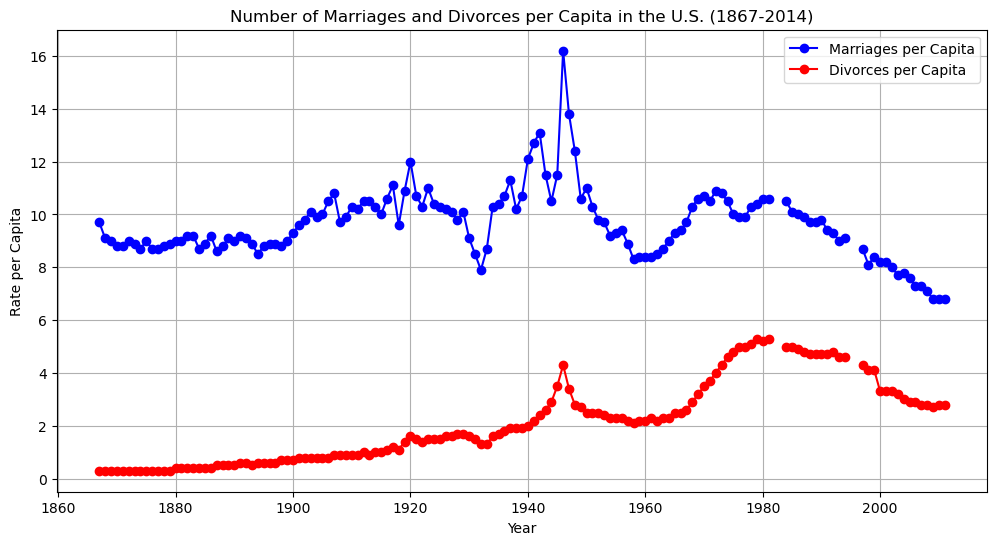

In [109]:
import pandas as pd
import matplotlib.pyplot as plt


file_path = "C:\\Users\\kngok\\Downloads\\us-marriages-divorces-1867-2014.csv"
data = pd.read_csv(file_path)


print("First few rows of the dataset:\n", data.head())


plt.figure(figsize=(12, 6))
plt.plot(data['Year'], data['Marriages_per_1000'], label='Marriages per Capita', color='blue', marker='o')
plt.plot(data['Year'], data['Divorces_per_1000'], label='Divorces per Capita', color='red', marker='o')


plt.xlabel('Year')
plt.ylabel('Rate per Capita')
plt.title('Number of Marriages and Divorces per Capita in the U.S. (1867-2014)')
plt.legend()
plt.grid(True)


plt.show()


Question 7
Create a vertical bar chart comparing the number of marriages and divorces per 
capita in the U.S. between 1900, 1950, and 2000.
Don't forget to label your axes

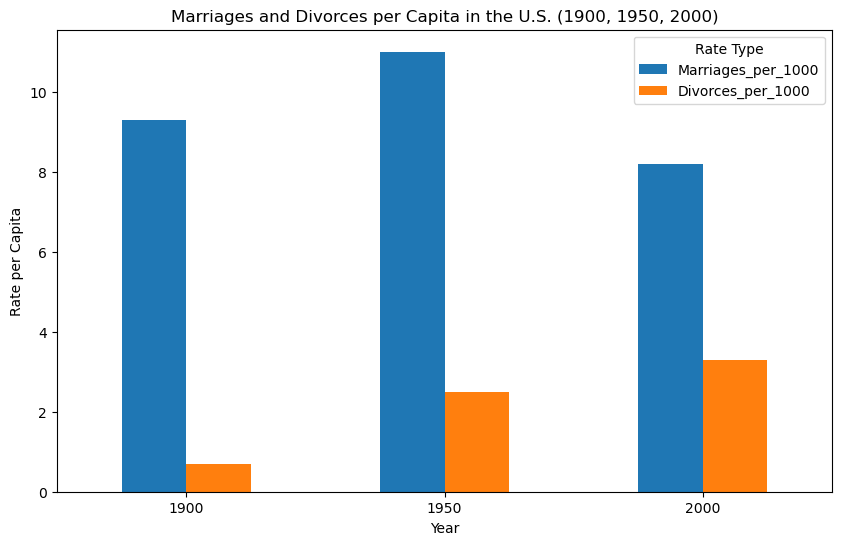

In [110]:
import pandas as pd
import matplotlib.pyplot as plt


file_path = "C:\\Users\\kngok\\Downloads\\us-marriages-divorces-1867-2014.csv"
data = pd.read_csv(file_path)


years_to_compare = [1900, 1950, 2000]
data_filtered = data[data['Year'].isin(years_to_compare)]


marriages_divorces = data_filtered[['Year', 'Marriages_per_1000', 'Divorces_per_1000']]
marriages_divorces.set_index('Year', inplace=True)


marriages_divorces.plot(kind='bar', figsize=(10, 6))


plt.xlabel('Year')
plt.ylabel('Rate per Capita')
plt.title('Marriages and Divorces per Capita in the U.S. (1900, 1950, 2000)')
plt.xticks(rotation=0)  # Rotate x-axis labels to horizontal for better readability
plt.legend(title='Rate Type')


plt.show()


Question 8
Create a horizontal bar chart that compares the deadliest actors in Hollywood. Sort 
the actors by their kill count and label each bar with the corresponding actor's name.
Don't forget to label your axes!


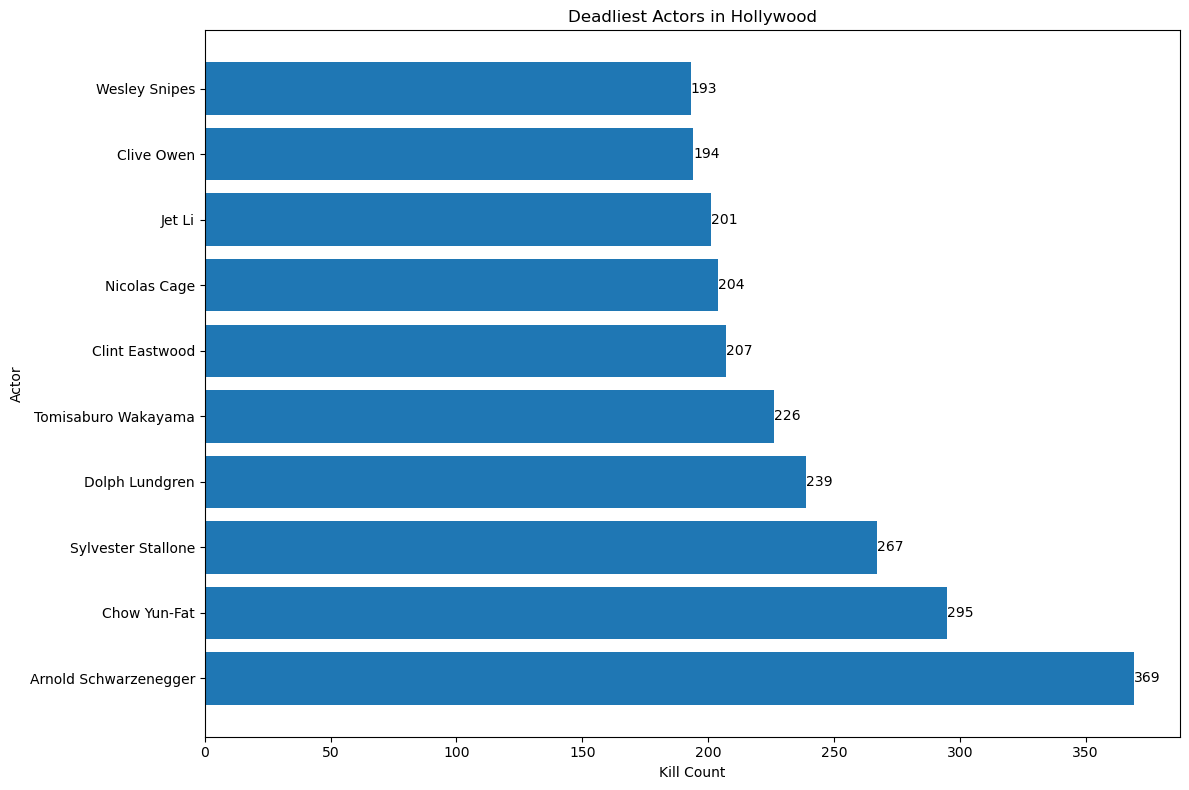

                   Actor  Count
0  Arnold Schwarzenegger    369
1           Chow Yun-Fat    295
7     Sylvester Stallone    267
4         Dolph Lundgren    239
8    Tomisaburo Wakayama    226
2         Clint Eastwood    207
6           Nicolas Cage    204
5                 Jet Li    201
3             Clive Owen    194
9          Wesley Snipes    193


In [116]:
import pandas as pd
import matplotlib.pyplot as plt


file_path = r"C:\Users\kngok\Downloads\actor_kill_counts.csv"
df = pd.read_csv(file_path)


df_sorted = df.sort_values('Count', ascending=False)


plt.figure(figsize=(12, 8))
bars = plt.barh(df_sorted['Actor'], df_sorted['Count'])


plt.xlabel('Kill Count')
plt.ylabel('Actor')
plt.title('Deadliest Actors in Hollywood')


for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2, f'{width}', 
             ha='left', va='center')


plt.tight_layout()


plt.show()


print(df_sorted)

Question 9
Create a pie chart showing the fraction of all Roman Emperors that were 
assassinated.
Make sure that the pie chart is an even circle, labels the categories, and shows the 
percentage breakdown of the categories.

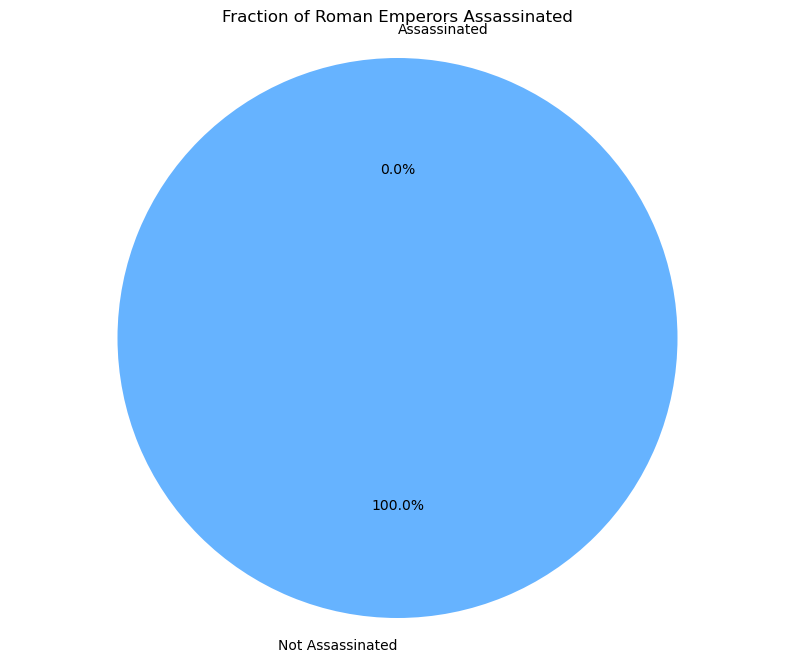

Total number of emperors: 68
Number of assassinated emperors: 0
Number of not assassinated emperors: 68
Percentage of assassinated emperors: 0.0%


In [117]:
import pandas as pd
import matplotlib.pyplot as plt


file_path = r"C:\Users\kngok\Downloads\roman-emperor-reigns.csv"
df = pd.read_csv(file_path)


assassinated = df['Cause_of_Death'].str.contains('Assassination', case=False, na=False).sum()
total_emperors = len(df)
not_assassinated = total_emperors - assassinated


sizes = [assassinated, not_assassinated]
labels = ['Assassinated', 'Not Assassinated']
colors = ['#ff9999', '#66b3ff']


plt.figure(figsize=(10, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)


plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Fraction of Roman Emperors Assassinated')


plt.show()


print(f"Total number of emperors: {total_emperors}")
print(f"Number of assassinated emperors: {assassinated}")
print(f"Number of not assassinated emperors: {not_assassinated}")
print(f"Percentage of assassinated emperors: {assassinated/total_emperors*100:.1f}%")

Question 10
Create a scatter plot showing the relationship between the total revenue earned by 
arcades and the number of Computer Science PhDs awarded in the U.S. between 
2000 and 2009.
Don't forget to label your axes!
Color each dot according to its year

Column names:
Index(['Year', 'Total Arcade Revenue (billions)',
       'Computer Science Doctorates Awarded (US)'],
      dtype='object')

First few rows of the DataFrame:
   Year  Total Arcade Revenue (billions)  \
0  2000                            1.196   
1  2001                            1.176   
2  2002                            1.269   
3  2003                            1.240   
4  2004                            1.307   

   Computer Science Doctorates Awarded (US)  
0                                       861  
1                                       830  
2                                       809  
3                                       867  
4                                       948  


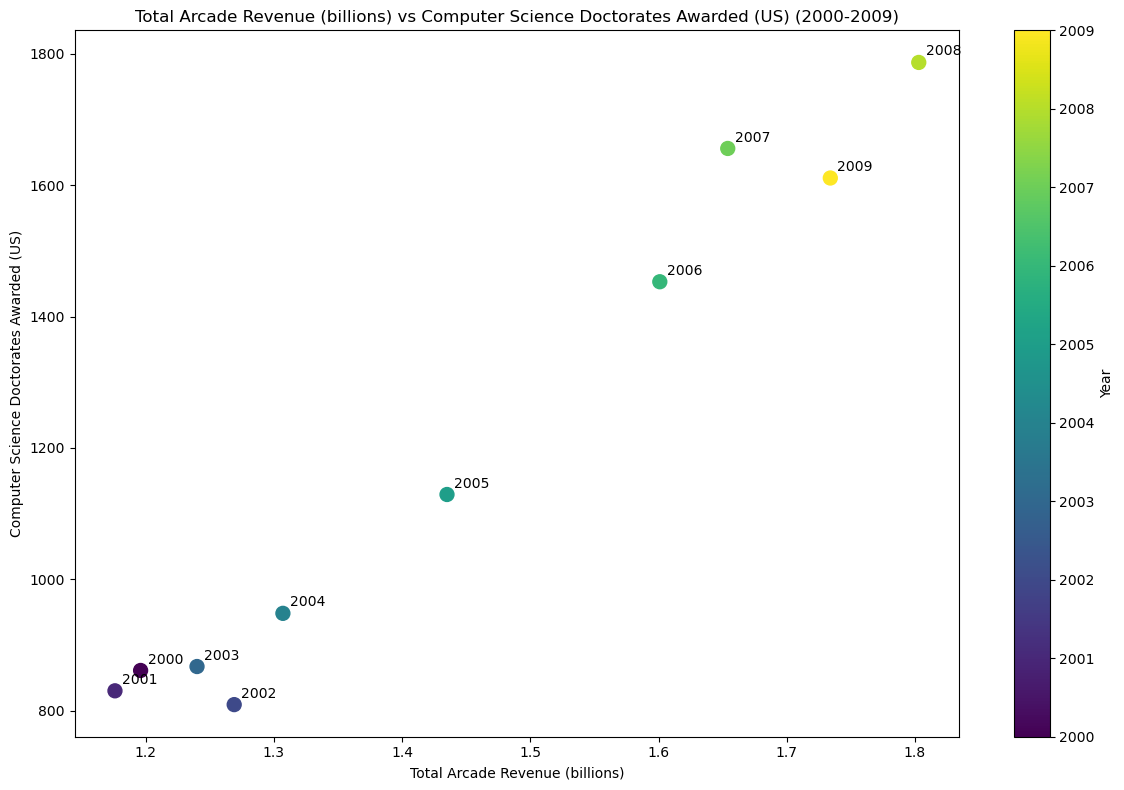


Full DataFrame:
   Year  Total Arcade Revenue (billions)  \
0  2000                            1.196   
1  2001                            1.176   
2  2002                            1.269   
3  2003                            1.240   
4  2004                            1.307   
5  2005                            1.435   
6  2006                            1.601   
7  2007                            1.654   
8  2008                            1.803   
9  2009                            1.734   

   Computer Science Doctorates Awarded (US)  
0                                       861  
1                                       830  
2                                       809  
3                                       867  
4                                       948  
5                                      1129  
6                                      1453  
7                                      1656  
8                                      1787  
9                                     

In [123]:
import pandas as pd
import matplotlib.pyplot as plt


file_path = r"C:\Users\kngok\Downloads\arcade-revenue-vs-cs-doctorates.csv"
df = pd.read_csv(file_path)


print("Column names:")
print(df.columns)


print("\nFirst few rows of the DataFrame:")
print(df.head())


columns = df.columns.tolist()
x_column = columns[1]  
y_column = columns[2]  

plt.figure(figsize=(12, 8))


scatter = plt.scatter(df[x_column], 
                      df[y_column],
                      c=df['Year'], 
                      cmap='viridis',
                      s=100)  


plt.xlabel(x_column)
plt.ylabel(y_column)
plt.title(f'{x_column} vs {y_column} (2000-2009)')


cbar = plt.colorbar(scatter)
cbar.set_label('Year')


for i, txt in enumerate(df['Year']):
    plt.annotate(txt, (df[x_column].iloc[i], df[y_column].iloc[i]),
                 xytext=(5, 5), textcoords='offset points')


plt.tight_layout()
plt.show()


print("\nFull DataFrame:")
print(df)